In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('car_prices.csv')


# Shape of the dataset
print("The shape of the dataset:", df.shape)

# Missing values
print("\nMissing values:")
print(df.isnull().sum())
df=df.drop('name',axis=1)

The shape of the dataset: (4340, 8)

Missing values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [77]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [78]:
df.columns


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [79]:
df.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [80]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())








Statistical Summary:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


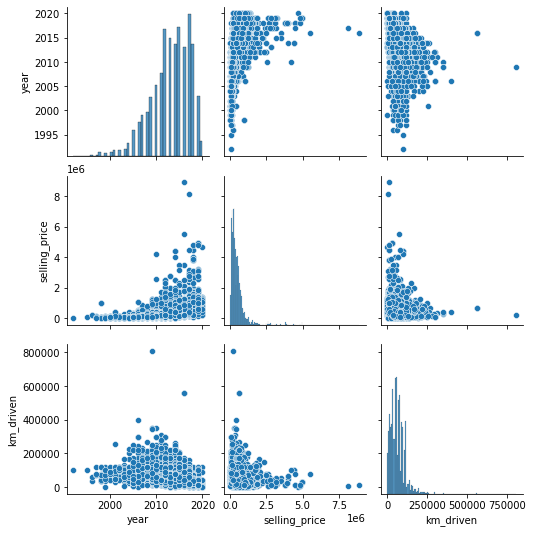

In [81]:
# Data Visualization
sns.pairplot(df)
plt.show()

# Handling Missing Values
#df = df.fillna(df.mean())






In [82]:
# Outlier Detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("\nIQR:")
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


IQR:
year                  5.00
selling_price    391250.25
km_driven         55000.00
dtype: float64


<ipython-input-82-cdf755602a6e>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [83]:
# Converting categorical features to numerical
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [84]:
df.shape


(3858, 18)

In [85]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)





In [86]:
# Train-Test Split
X = df_scaled.drop('selling_price', axis=1)
y = df_scaled['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Building
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [87]:
# Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.5849759160120291
Mean Absolute Error: 0.5127384320972331


In [88]:
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# Model Evaluation
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


Mean Squared Error: 0.4299161070828558
